In [1]:
import numpy as np
import pandas as pd

from catboost import CatBoostClassifier

import shap

from sklearn.model_selection import train_test_split

C:\Users\Mr0Wo\anaconda3\envs\MLDP\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
C:\Users\Mr0Wo\anaconda3\envs\MLDP\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_mask

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.


In [52]:
data = pd.read_csv("C:/Users/Mr0Wo/OneDrive/Рабочий стол/data/for analysis/Analytical_Task_2 (taxi startup).csv")

In [53]:
data.head()

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,...,device_token,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
0,22,22,2020-02-02 3:37:31,4.04,10.0,2839,700,1,client,finished,...,NaN,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0
1,618,618,2020-02-08 2:26:19,6.09,3.6,5698,493,1,client,finished,...,NaN,CA.5.43,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,NaN
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,...,NaN,CA.5.43,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166.0
3,313,313,2020-02-05 6:34:54,72871.72,NaN,49748,1400,0,client,finished,...,NaN,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,NaN
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,...,NaN,CA.5.04,finished,finished,DA.4.37,433,Itel W5504,0,0,NaN


The key aspect of ride-hailing is the price. It relies on technology to collect accurate tracking data so that a fair price can be calculated at the end of the trip. Fortunately, our riders are quick to tell us when they overpaid and we can use that feedback to improve our product.

Please analyze the dataset to identify top opportunities for reducing the number of overcharge tickets and present your results. Please provide us with a PDF file/document with the findings. Finally, you shouldn’t spend more than 8 hours on this analysis.

Variables in the file:

order_id_new, order_try_id_new - id of an order

calc_created- time when the order was created

metered_price, distance, duration- actual price, distance and duration of a ride

upfront_price- promised to the rider price, based on predicted duration (predicted_duration) and distance (predicted_distance)

distance - ride distance

duration - ride duration

gps_confidence- indicator for good GPS connection (1 - good one, 0 - bad one)

entered_by- who entered the address

b_state- state of a ride (finished implies that the ride was actually done)

dest_change_number- number of destination changes by a rider

predicted distance - predicted duration of a ride based on the pickup and dropoff points entered by the rider requesting a car

predicted duration - predicted duration of a ride based on the pickup and dropoff points entered by the rider requesting a car

prediction_price_type- internal variable for the type of prediction:

upfront, prediction - prediction happened before the ride

upfront_destination_changed - prediction happened after rider changed destination during the ride

change_reason_pricing - records due to whose action the price changed

ticket_id_new - id for customer support ticket


target: 
    overpaid_ride_ticket -> min

# Feature importance from catboost

In [54]:
data.head()

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,...,device_token,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
0,22,22,2020-02-02 3:37:31,4.04,10.0,2839,700,1,client,finished,...,NaN,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0
1,618,618,2020-02-08 2:26:19,6.09,3.6,5698,493,1,client,finished,...,NaN,CA.5.43,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,NaN
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,...,NaN,CA.5.43,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166.0
3,313,313,2020-02-05 6:34:54,72871.72,NaN,49748,1400,0,client,finished,...,NaN,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,NaN
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,...,NaN,CA.5.04,finished,finished,DA.4.37,433,Itel W5504,0,0,NaN


In [55]:
# Transform column calc_created from object to datetime
data['calc_created'] = pd.to_datetime(data['calc_created'], format='%Y-%m-%d %H:%M:%S')

In [56]:
# DropNan with thresh > 80% and creating df_for_catboost
df_for_catboost = data.loc[:, data.isnull().mean() < .8]

In [57]:
df_for_catboost.isna().mean()

order_id_new             0.000000
order_try_id_new         0.000000
calc_created             0.000000
metered_price            0.004046
upfront_price            0.310338
distance                 0.000000
duration                 0.000000
gps_confidence           0.000000
entered_by               0.000000
b_state                  0.000000
dest_change_number       0.000000
prediction_price_type    0.004046
predicted_distance       0.004046
predicted_duration       0.004046
ticket_id_new            0.000000
rider_app_version        0.003237
order_state              0.000000
order_try_state          0.000000
driver_app_version       0.000000
driver_device_uid_new    0.000000
device_name              0.000000
eu_indicator             0.000000
overpaid_ride_ticket     0.000000
fraud_score              0.558163
dtype: float64

In [58]:
# Definition of categorical features
cat_fetures = df_for_catboost.select_dtypes(include='object').columns.values

In [59]:
df_for_catboost[cat_fetures].isna().mean()

entered_by               0.000000
b_state                  0.000000
prediction_price_type    0.004046
rider_app_version        0.003237
order_state              0.000000
order_try_state          0.000000
driver_app_version       0.000000
device_name              0.000000
dtype: float64

In [60]:
# DropNa in columns prediction_price_type and rider_app_version
df_for_catboost = df_for_catboost[(~df_for_catboost['prediction_price_type'].isna()) & (~df_for_catboost['rider_app_version'].isna())]

In [61]:
df_for_catboost.isna().mean()

order_id_new             0.000000
order_try_id_new         0.000000
calc_created             0.000000
metered_price            0.000000
upfront_price            0.307536
distance                 0.000000
duration                 0.000000
gps_confidence           0.000000
entered_by               0.000000
b_state                  0.000000
dest_change_number       0.000000
prediction_price_type    0.000000
predicted_distance       0.000000
predicted_duration       0.000000
ticket_id_new            0.000000
rider_app_version        0.000000
order_state              0.000000
order_try_state          0.000000
driver_app_version       0.000000
driver_device_uid_new    0.000000
device_name              0.000000
eu_indicator             0.000000
overpaid_ride_ticket     0.000000
fraud_score              0.556774
dtype: float64

In [62]:
# Transform datetime to unix time and drop columns calc_created
df_for_catboost['dt_unix'] = df_for_catboost['calc_created'].astype(np.int64) / 10**9
df_for_catboost.drop(columns='calc_created', inplace=True)

In [63]:
df_for_catboost.head()

,order_id_new,order_try_id_new,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,dest_change_number,...,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score,dt_unix
0,22,22,4.04,10.0,2839,700,1,client,finished,1,...,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0,1.580615e+09
1,618,618,6.09,3.6,5698,493,1,client,finished,1,...,CA.5.43,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,NaN,1.581129e+09
2,657,657,4.32,3.5,4426,695,1,client,finished,1,...,CA.5.43,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166.0,1.581163e+09
3,313,313,72871.72,NaN,49748,1400,0,client,finished,2,...,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,NaN,1.580884e+09
4,1176,1176,20032.50,19500.0,10273,5067,1,client,finished,1,...,CA.5.04,finished,finished,DA.4.37,433,Itel W5504,0,0,NaN,1.581615e+09


In [69]:
# difference determination between order_id_new and order_try_id_new
print(df_for_catboost[df_for_catboost.order_id_new != df_for_catboost.order_try_id_new].shape)
df_for_catboost.shape

(58, 24)


(4923, 24)

In [70]:
X = df_for_catboost.drop(columns=['overpaid_ride_ticket', 'order_id_new', 'order_try_id_new'])
y = df_for_catboost.overpaid_ride_ticket

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.3)

In [72]:
model = CatBoostClassifier(cat_features=cat_fetures,
                           eval_metric='AUC',
                          verbose=100)

In [73]:
model.fit(X_train, y_train)

iteritems is deprecated and will be removed in a future version. Use .items instead.


Learning rate set to 0.017473
0:	total: 15.5ms	remaining: 15.5s
100:	total: 1.54s	remaining: 13.7s
200:	total: 3.4s	remaining: 13.5s
300:	total: 5.26s	remaining: 12.2s
400:	total: 7.01s	remaining: 10.5s
500:	total: 9.01s	remaining: 8.97s
600:	total: 11.2s	remaining: 7.42s
700:	total: 13.1s	remaining: 5.59s
800:	total: 15.1s	remaining: 3.75s
900:	total: 17.5s	remaining: 1.92s
999:	total: 19.6s	remaining: 0us


In [74]:
model.feature_importances_

array([12.96146285,  3.75811742,  6.2630054 ,  5.01814982,  4.07859175,
        0.49080842,  0.        ,  1.10303507,  7.06609578,  3.31424195,
        4.47183939,  3.58952407,  6.24626328,  0.        ,  0.        ,
        7.24379091,  4.7585519 ,  9.27588009,  7.88918845,  7.0103607 ,
        5.46109276])

In [94]:
df_feature_importances = pd.DataFrame({'Features':X_train.columns.values, 'Feature_importances':model.feature_importances_})
df_feature_importances.sort_values('Feature_importances', ascending=False)

,Features,Feature_importances
0,metered_price,12.961463
17,device_name,9.275880
18,eu_indicator,7.889188
15,driver_app_version,7.243791
8,prediction_price_type,7.066096
19,fraud_score,7.010361
2,distance,6.263005
12,rider_app_version,6.246263
20,dt_unix,5.461093
3,duration,5.018150


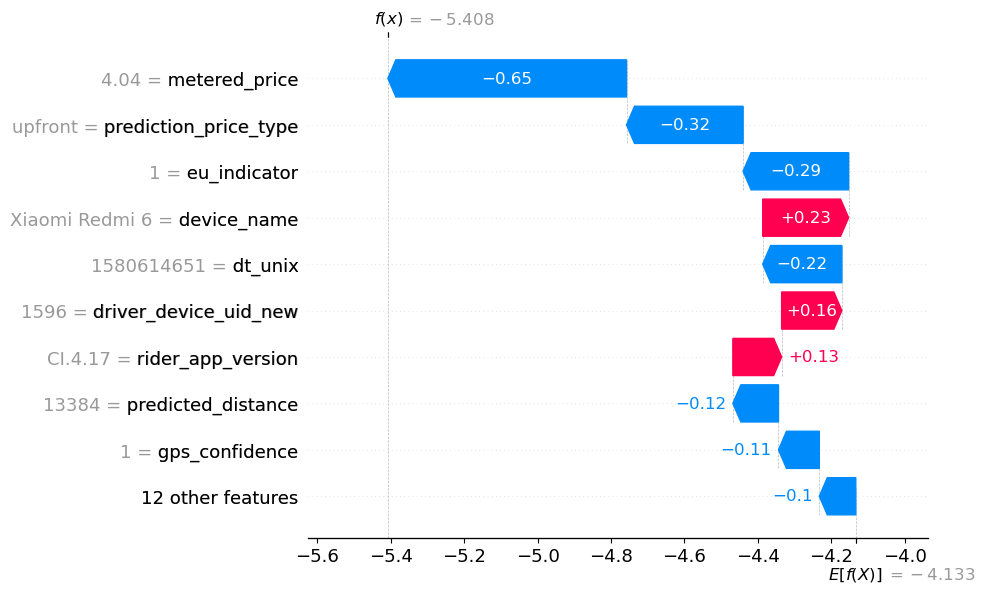

In [78]:
# Shap interpretation
explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[0])

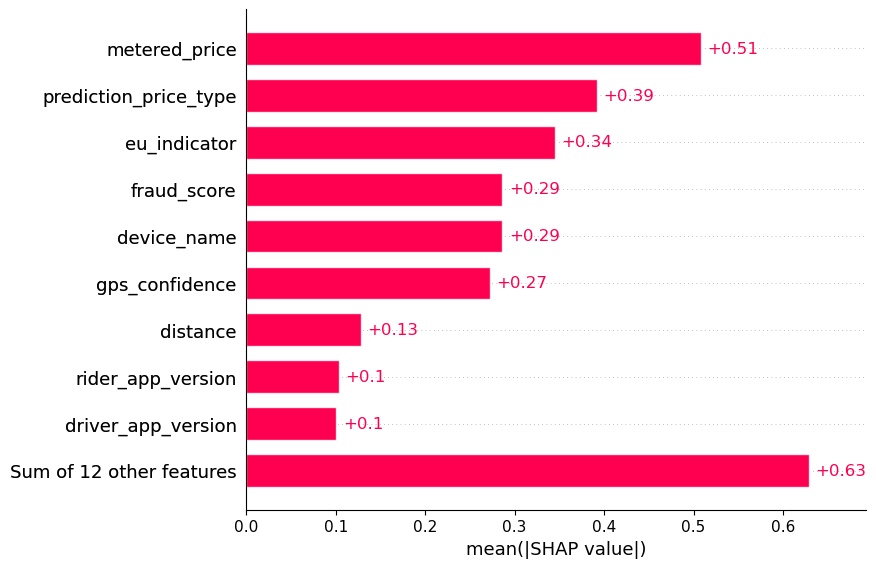

In [79]:
shap.plots.bar(shap_values)

### Features for fast check: device_name, eu_indicator, prediction_price_type, gps_confidence

# Features analysis
## device_name

In [80]:
df = df_for_catboost.copy()

In [87]:
# Number of unique models
df['device_name'].nunique()

497

In [88]:
df['device_name']

0          Xiaomi Redmi 6
1        Samsung SM-G965F
2        Samsung SM-A530F
3                TECNO-Y6
4              Itel W5504
              ...        
4938       HUAWEI LYA-L29
4939     Samsung SM-G928F
4940       HUAWEI AMN-LX9
4941    TP-Link Neffos X1
4942     Samsung SM-A260F
Name: device_name, Length: 4923, dtype: object

In [89]:
# Sort models by percentage(mean) overpaid_ride_ticket
df.groupby('device_name')['overpaid_ride_ticket'].agg({'count','mean'}).sort_values('count', ascending=False)

,mean,count
device_name,,
TECNO MOBILE LIMITED TECNO B1p,0.259259,108
HMD Global Nokia 2.2,0.040816,98
"iPhone8,1",0.011236,89
TECNO F3,0.151163,86
HUAWEI MAR-LX1A,0.000000,72
...,...,...
Itel it1407,0.000000,1
Samsung SM-N920V,0.000000,1
HTC U Ultra,1.000000,1


In [90]:
# Function for splitting models into groups
def device_cat(device_name):
    if 'tecno' in device_name.lower():
        return 'tecno'
    if 'iphone' in device_name.lower():
        return 'iphone'
    if 'lg' in device_name.lower():
        return 'lg'
    if 'samsung' in device_name.lower():
        return 'samsung'
    if 'htc' in device_name.lower():
        return 'htc'
    if 'nokia' in device_name.lower():
        return 'nokia'
    if 'xiaomi'in device_name.lower():
        return 'xiaomi'
    if 'HUAWEI'.lower() in device_name.lower():
        return 'HUAWEI'.lower()
    if 'INFINIX'.lower() in device_name.lower():
        return 'INFINIX'.lower()
    if 'LENOVO'.lower() in device_name.lower():
        return 'LENOVO'.lower()
    if 'OPPO'.lower() in device_name.lower():
        return 'OPPO'.lower()
    if 'Itel'.lower() in device_name.lower():
        return 'Itel'.lower()
    if 'Sony'.lower() in device_name.lower():
        return 'Sony'.lower()
    return 'other'

In [91]:
df['device_group'] = df['device_name'].apply(device_cat)

In [93]:
# Sort device_group by percentage(mean) overpaid_ride_ticket
df.groupby('device_group')['overpaid_ride_ticket'].agg({'count','mean'}).sort_values('mean', ascending=False)

,mean,count
device_group,,
htc,0.312500,16
tecno,0.167203,933
oppo,0.136364,22
itel,0.133333,120
infinix,0.124060,266
nokia,0.113924,158
other,0.062222,225
samsung,0.038806,1675
sony,0.022727,44


### It is obvious that there are models that strongly influence the target variable. For example models like tecno, infinix, itel, htc, nokia

## gps_confidence

In [95]:
df.groupby('gps_confidence')['overpaid_ride_ticket'].agg({'count','mean'})

,mean,count
gps_confidence,,
0,0.204476,983
1,0.034518,3940


In [100]:
df.groupby('gps_confidence')['device_group'].value_counts()

gps_confidence  device_group
0               tecno            409
                samsung          197
                infinix           90
                other             63
                huawei            52
                itel              51
                nokia             45
                iphone            34
                xiaomi            15
                sony              10
                oppo               8
                htc                6
                lg                 2
                lenovo             1
1               samsung         1478
                huawei           668
                tecno            524
                iphone           390
                xiaomi           243
                infinix          176
                other            162
                nokia            113
                itel              69
                lg                37
                sony              34
                lenovo            22
         

## prediction_price_type

In [96]:
df.groupby('prediction_price_type')['overpaid_ride_ticket'].agg({'count','mean'})

,mean,count
prediction_price_type,,
prediction,0.173573,1279
upfront,0.032634,3432
upfront_destination_changed,0.014423,208
upfront_waypoint_changed,0.000000,4


## eu_indicator

In [97]:
df.groupby('eu_indicator')['overpaid_ride_ticket'].agg({'count','mean'})

,mean,count
eu_indicator,,
0,0.149103,2173
1,0.004727,2750


In [98]:
df.groupby('eu_indicator')['device_group'].value_counts()

eu_indicator  device_group
0             tecno            933
              samsung          424
              infinix          266
              nokia            127
              itel             119
              other            111
              huawei            64
              iphone            60
              oppo              22
              xiaomi            21
              htc               10
              sony              10
              lg                 5
              lenovo             1
1             samsung         1251
              huawei           656
              iphone           364
              xiaomi           237
              other            114
              lg                34
              sony              34
              nokia             31
              lenovo            22
              htc                6
              itel               1
Name: device_group, dtype: int64

## Вывод: 
### Определенные марки девайсов заметно влияют на кол-во оверпрайс чеков. 
### Большая часть данных девайсов находится в eu_indicator=0, поэтому, в eu_indicator=0 значительно выше процент оверпрайс чеков
### Большинство оверпрайс чеков находятся в группе с автоматически выставленной ценой (prediction_price_type=prediction)
### В группе заказов с нестабильным gps соединением(gps_confidence=0) доля оверпайс чеков заметно выше
### Модели девайсов, о которых говорилось выше, чаще обладают нестабильным gps соединением 

### Обобщение: 
###        У девайсов марок tecno, infinix, nokia, itel часто наблюдаются проблемы с gps соединением, из-за чего у алгоритма предсказания цен возникают проблемы с корректным определением цены 